In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Activation, BatchNormalization, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
# Setting random seeds for reproducibility
seed_value = 42

def add_noise(img):
    '''Add random noise to an image'''
    variability = 50
    deviation = variability*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img

# Initialize parameters
TRAIN_DIR = './data/training'
VAL_DIR = './data/validation'
TEST_DIR = './data/testing'
train_datagen = ImageDataGenerator(rescale=1./255,
                                   preprocessing_function=add_noise)
                             
test_datagen = ImageDataGenerator(rescale = 1./255)
                             
class_names = ['INDEX_UP', 'V_SIGN', 'THUMB_LEFT', 'THUMB_RIGHT', 'FIST', 'FIVE_WIDE', 'PALM', 'SHAKA', 'NOTHING']
batch_size=32
epochs=10
width = 96
height = 96
color_channels = 3

In [3]:
# Load and iterate training dataset
train_generator = train_datagen.flow_from_directory(TRAIN_DIR, 
                                       target_size=(96, 96),
                                       batch_size=batch_size,
                                       class_mode='categorical', 
                                       seed=seed_value)

# Load and iterate validation dataset
validation_generator = test_datagen.flow_from_directory(VAL_DIR,
                                     target_size=(96, 96),
                                     batch_size=batch_size,
                                     class_mode='categorical',
                                     seed=seed_value)

# Load and iterate testing dataset
test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                     target_size=(96, 96),
                                     batch_size=1,
                                     class_mode='categorical',
                                     seed=seed_value)

Found 3672 images belonging to 9 classes.
Found 918 images belonging to 9 classes.
Found 810 images belonging to 9 classes.


[0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0.]


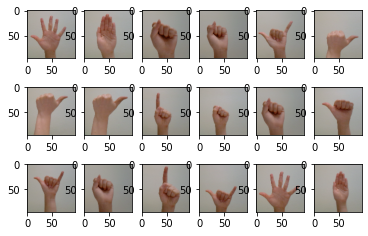

In [4]:
x_batch, y_batch = train_generator.next()

for i in range(0, 18):
    image = x_batch[i]
    plt.subplot(3, 6, i+1), plt.imshow(image)
    print(y_batch[i])
plt.show()

In [5]:
model = Sequential()
model.add(Convolution2D(16, (3, 3),
                        input_shape=(width, height, color_channels),
                        activation='relu',
                        padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Convolution2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
    
model.add(Flatten())
    
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(len(class_names), activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0

In [6]:
print('FITTING MODEL ON TRAINING DATA.....')
history = model.fit(train_generator, 
          batch_size=batch_size,
          steps_per_epoch=train_generator.samples // batch_size,
          validation_data=validation_generator, 
          validation_steps=validation_generator.samples // batch_size,
          epochs=epochs)

print('\nEVALUATING MODEL WITH TESTING SET.....')
score = model.evaluate(test_generator, batch_size=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save('pyearth_cnn_model_0711.h5')

FITTING MODEL ON TRAINING DATA.....
Epoch 1/50
114/114 [==============================] - 18s 160ms/step - loss: 2.4659 - accuracy: 0.1121 - val_loss: 2.1973 - val_accuracy: 0.1138
Epoch 2/50
114/114 [==============================] - 18s 159ms/step - loss: 1.9650 - accuracy: 0.2401 - val_loss: 0.9470 - val_accuracy: 0.8080
Epoch 3/50
114/114 [==============================] - 20s 175ms/step - loss: 0.2871 - accuracy: 0.9129 - val_loss: 0.4639 - val_accuracy: 0.8828
Epoch 4/50
114/114 [==============================] - 20s 175ms/step - loss: 0.0659 - accuracy: 0.9791 - val_loss: 0.5423 - val_accuracy: 0.9062
Epoch 5/50
114/114 [==============================] - 20s 176ms/step - loss: 0.0410 - accuracy: 0.9857 - val_loss: 0.3628 - val_accuracy: 0.9129
Epoch 6/50
114/114 [==============================] - 20s 176ms/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.5182 - val_accuracy: 0.9163
Epoch 7/50
114/114 [==============================] - 20s 178ms/step - loss: 0.0237 - accuracy

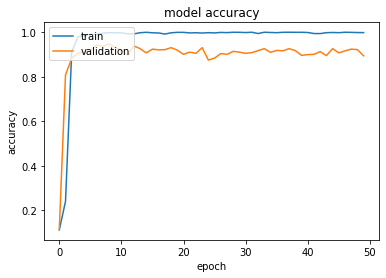

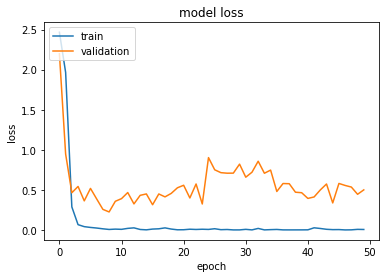

In [7]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()